In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
%matplotlib inline

data_117 = pd.read_csv("sequential_data/metrics/wally117_metrics.csv")
data_122 = pd.read_csv("sequential_data/metrics/wally122_metrics.csv")
data_124 = pd.read_csv("sequential_data/metrics/wally124_metrics.csv")
data_123 = pd.read_csv("sequential_data/metrics/wally123_metrics.csv")
data_113 = pd.read_csv("sequential_data/metrics/wally113_metrics.csv")

data_117['now'] = data_117['now'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S CEST'))
data_122['now'] = data_122['now'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S CEST'))
data_124['now'] = data_124['now'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S CEST'))
data_123['now'] = data_123['now'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S CEST'))
data_113['now'] = data_113['now'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S CEST'))

t_start = datetime.strptime("2019-11-19 18:38:39", "%Y-%m-%d %H:%M:%S")
t_end = datetime.strptime("2019-11-20 02:30:00", "%Y-%m-%d %H:%M:%S")

data_117 = data_117[(data_117['now'] >= t_start) & (data_117['now'] <= t_end)]
data_122 = data_122[(data_122['now'] >= t_start) & (data_122['now'] <= t_end)]
data_124 = data_124[(data_124['now'] >= t_start) & (data_124['now'] <= t_end)]
data_123 = data_123[(data_123['now'] >= t_start) & (data_123['now'] <= t_end)]
data_113 = data_113[(data_113['now'] >= t_start) & (data_113['now'] <= t_end)]

In [2]:
data_117 = data_117.groupby('now').mean().reset_index()
data_122 = data_122.groupby('now').mean().reset_index()
data_124 = data_124.groupby('now').mean().reset_index()
data_123 = data_123.groupby('now').mean().reset_index()
data_113 = data_113.groupby('now').mean().reset_index()

print("Size of metrics 117 after averaging = ", data_117['now'].size)
print("Size of metrics 122 after averaging = ", data_122['now'].size)
print("Size of metrics 124 after averaging = ", data_124['now'].size)
print("Size of metrics 123 after averaging = ", data_123['now'].size)
print("Size of metrics 113 after averaging = ", data_113['now'].size)

Size of metrics 117 after averaging =  28280
Size of metrics 122 after averaging =  28279
Size of metrics 124 after averaging =  28280
Size of metrics 123 after averaging =  28280
Size of metrics 113 after averaging =  23206


In [3]:
data_117['gap'] = (data_117['now'].diff()).dt.seconds > 1
data_122['gap'] = (data_122['now'].diff()).dt.seconds > 1
data_124['gap'] = (data_124['now'].diff()).dt.seconds > 1
data_123['gap'] = (data_123['now'].diff()).dt.seconds > 1
data_113['gap'] = (data_113['now'].diff()).dt.seconds > 1

In [4]:
gaps_117 = []
time_slots_117 = list(data_117[data_117['gap']]['now'])
for e in time_slots_117:
    s = list(data_117[data_117['now'] < e].tail(1)['now'])
    g = pd.date_range(s[0], e, freq = 'S')
    g.freq = None
    gap = list(g)
    gaps_117 += gap[1:-1]

gaps_122 = []
time_slots_122 = list(data_122[data_122['gap']]['now'])
for e in time_slots_122:
    s = list(data_122[data_122['now'] < e].tail(1)['now'])
    g = pd.date_range(s[0], e, freq = 'S')
    g.freq = None
    gap = list(g)
    gaps_122 += gap[1:-1]
    
gaps_124 = []
time_slots_124 = list(data_124[data_124['gap']]['now'])
for e in time_slots_124:
    s = list(data_124[data_124['now'] < e].tail(1)['now'])
    g = pd.date_range(s[0], e, freq = 'S')
    g.freq = None
    gap = list(g)
    gaps_124 += gap[1:-1]
    
gaps_123 = []
time_slots_123 = list(data_123[data_123['gap']]['now'])
for e in time_slots_123:
    s = list(data_123[data_123['now'] < e].tail(1)['now'])
    g = pd.date_range(s[0], e, freq = 'S')
    g.freq = None
    gap = list(g)
    gaps_123 += gap[1:-1]
    
gaps_113 = []
time_slots_113 = list(data_113[data_113['gap']]['now'])
for e in time_slots_113:
    s = list(data_113[data_113['now'] < e].tail(1)['now'])
    g = pd.date_range(s[0], e, freq = 'S')
    g.freq = None
    gap = list(g)
    gaps_113 += gap[1:-1]

In [5]:
print('117:', gaps_117)
print('122:', gaps_122)
print('124:', gaps_124)
print('123:', gaps_123)
print('113:', gaps_113)

117: [Timestamp('2019-11-19 23:52:06'), Timestamp('2019-11-20 01:00:12')]
122: [Timestamp('2019-11-19 20:29:36'), Timestamp('2019-11-20 00:59:53'), Timestamp('2019-11-20 01:00:10')]
124: [Timestamp('2019-11-19 23:52:05'), Timestamp('2019-11-20 01:00:03')]
123: [Timestamp('2019-11-19 23:52:07'), Timestamp('2019-11-20 01:00:03')]
113: [Timestamp('2019-11-19 20:39:24'), Timestamp('2019-11-19 20:57:40'), Timestamp('2019-11-19 20:58:14'), Timestamp('2019-11-19 20:58:26'), Timestamp('2019-11-19 20:58:29'), Timestamp('2019-11-19 20:59:41'), Timestamp('2019-11-19 20:59:48'), Timestamp('2019-11-19 20:59:53'), Timestamp('2019-11-19 21:07:31'), Timestamp('2019-11-19 21:07:38'), Timestamp('2019-11-19 21:07:46'), Timestamp('2019-11-19 21:07:52'), Timestamp('2019-11-19 21:13:36'), Timestamp('2019-11-19 21:13:39'), Timestamp('2019-11-19 21:14:03'), Timestamp('2019-11-19 21:14:10'), Timestamp('2019-11-19 21:14:17'), Timestamp('2019-11-19 21:14:26'), Timestamp('2019-11-19 21:15:36'), Timestamp('2019-11

In [6]:
print('Number of gaps in 117:', len(gaps_117))
print('Number of gaps in 122:', len(gaps_122))
print('Number of gaps in 124:', len(gaps_124))
print('Number of gaps in 123:', len(gaps_123))
print('Number of gaps in 113:', len(gaps_113))

Number of gaps in 117: 2
Number of gaps in 122: 3
Number of gaps in 124: 2
Number of gaps in 123: 2
Number of gaps in 113: 5076


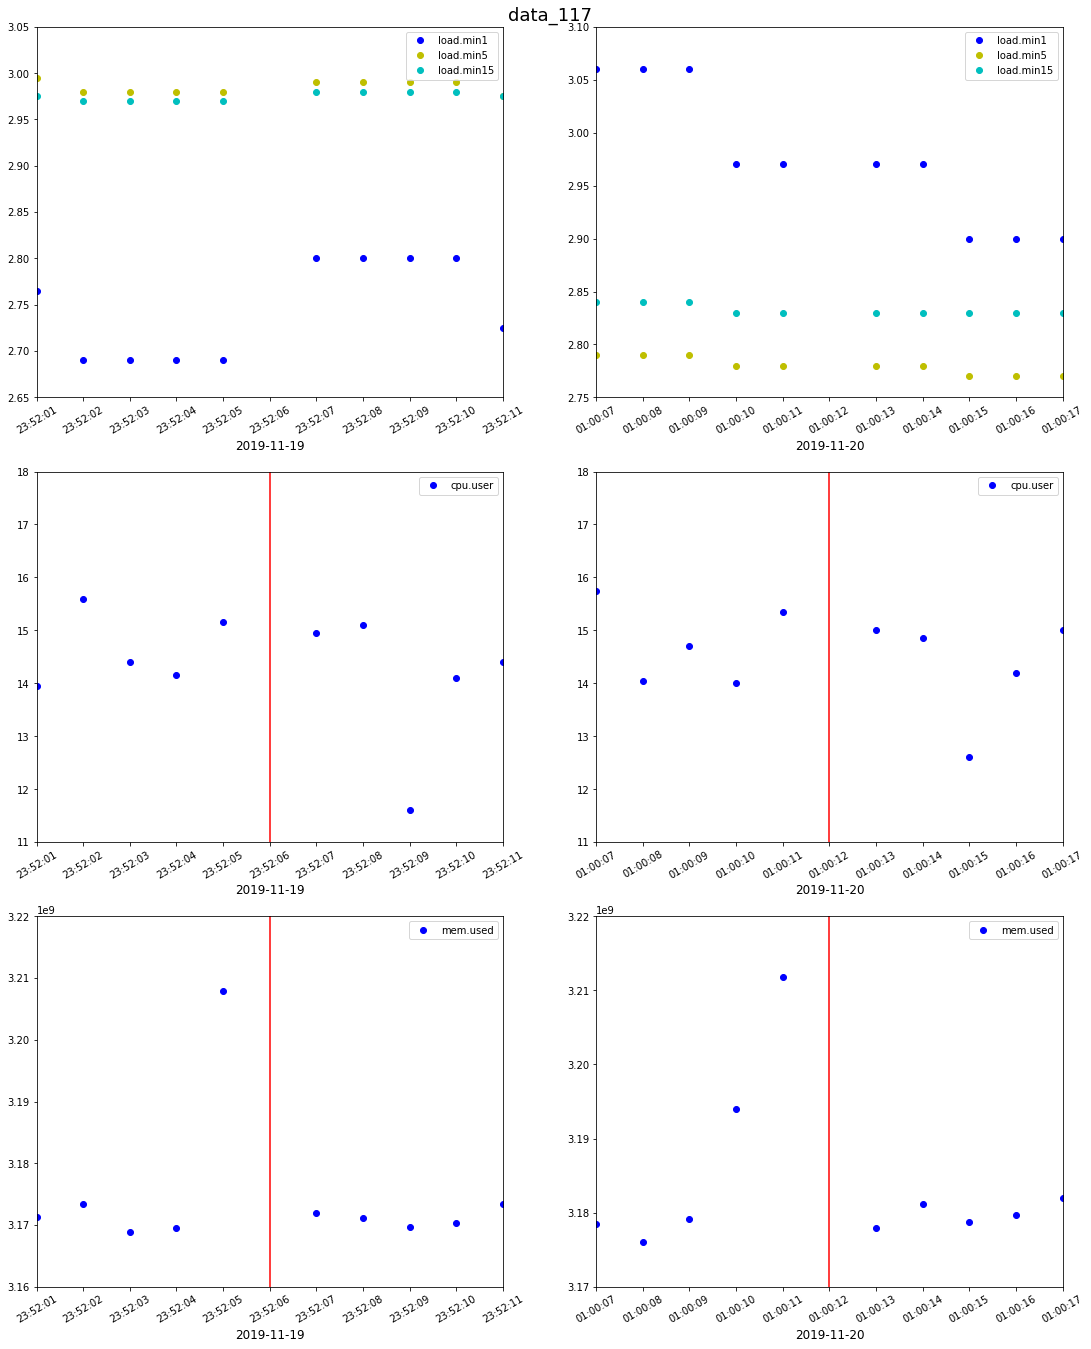

In [7]:
# [Timestamp('2019-11-19 23:52:06'), Timestamp('2019-11-20 01:00:12')]

fig, axes = plt.subplots(3, 2)

axes[0, 0].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_117)
axes[0, 0].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_117)
axes[0, 0].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_117)
axes[0, 0].legend()
plt.setp(axes[0, 0], ylim = (2.65, 3.05), xlim = ('2019-11-19 23:52:01', '2019-11-19 23:52:11'))
axes[0, 0].set_xlabel('2019-11-19', fontsize = 12)
axes[0, 0].set_title("data_117", fontsize = 18, x = 1.1)

axes[0, 1].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_117)
axes[0, 1].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_117)
axes[0, 1].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_117)
axes[0, 1].legend()
plt.setp(axes[0, 1], ylim = (2.75, 3.1), xlim = ('2019-11-20 01:00:07', '2019-11-20 01:00:17'))
axes[0, 1].set_xlabel('2019-11-20', fontsize = 12)


axes[1, 0].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_117)
axes[1, 0].legend()
plt.setp(axes[1, 0], ylim = (11, 18), xlim = ('2019-11-19 23:52:01', '2019-11-19 23:52:11'))
axes[1, 0].axvline(x = '2019-11-19 23:52:06', color = 'red')
axes[1, 0].set_xlabel('2019-11-19', fontsize = 12)

axes[1, 1].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_117)
axes[1, 1].legend()
plt.setp(axes[1, 1], ylim = (11, 18), xlim = ('2019-11-20 01:00:07', '2019-11-20 01:00:17'))
axes[1, 1].axvline(x = '2019-11-20 01:00:12', color = 'red')
axes[1, 1].set_xlabel('2019-11-20', fontsize = 12)


axes[2, 0].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_117)
axes[2, 0].legend()
plt.setp(axes[2, 0], ylim = (3160000000, 3220000000), xlim = ('2019-11-19 23:52:01', '2019-11-19 23:52:11'))
axes[2, 0].axvline(x = '2019-11-19 23:52:06', color = 'red')
axes[2, 0].set_xlabel('2019-11-19', fontsize = 12)

axes[2, 1].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_117)
axes[2, 1].legend()
plt.setp(axes[2, 1], ylim = (3170000000, 3220000000), xlim = ('2019-11-20 01:00:07', '2019-11-20 01:00:17'))
axes[2, 1].axvline(x = '2019-11-20 01:00:12', color = 'red')
axes[2, 1].set_xlabel('2019-11-20', fontsize = 12)


plt.subplots_adjust(top = 4.5, right = 2.5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)

plt.show()

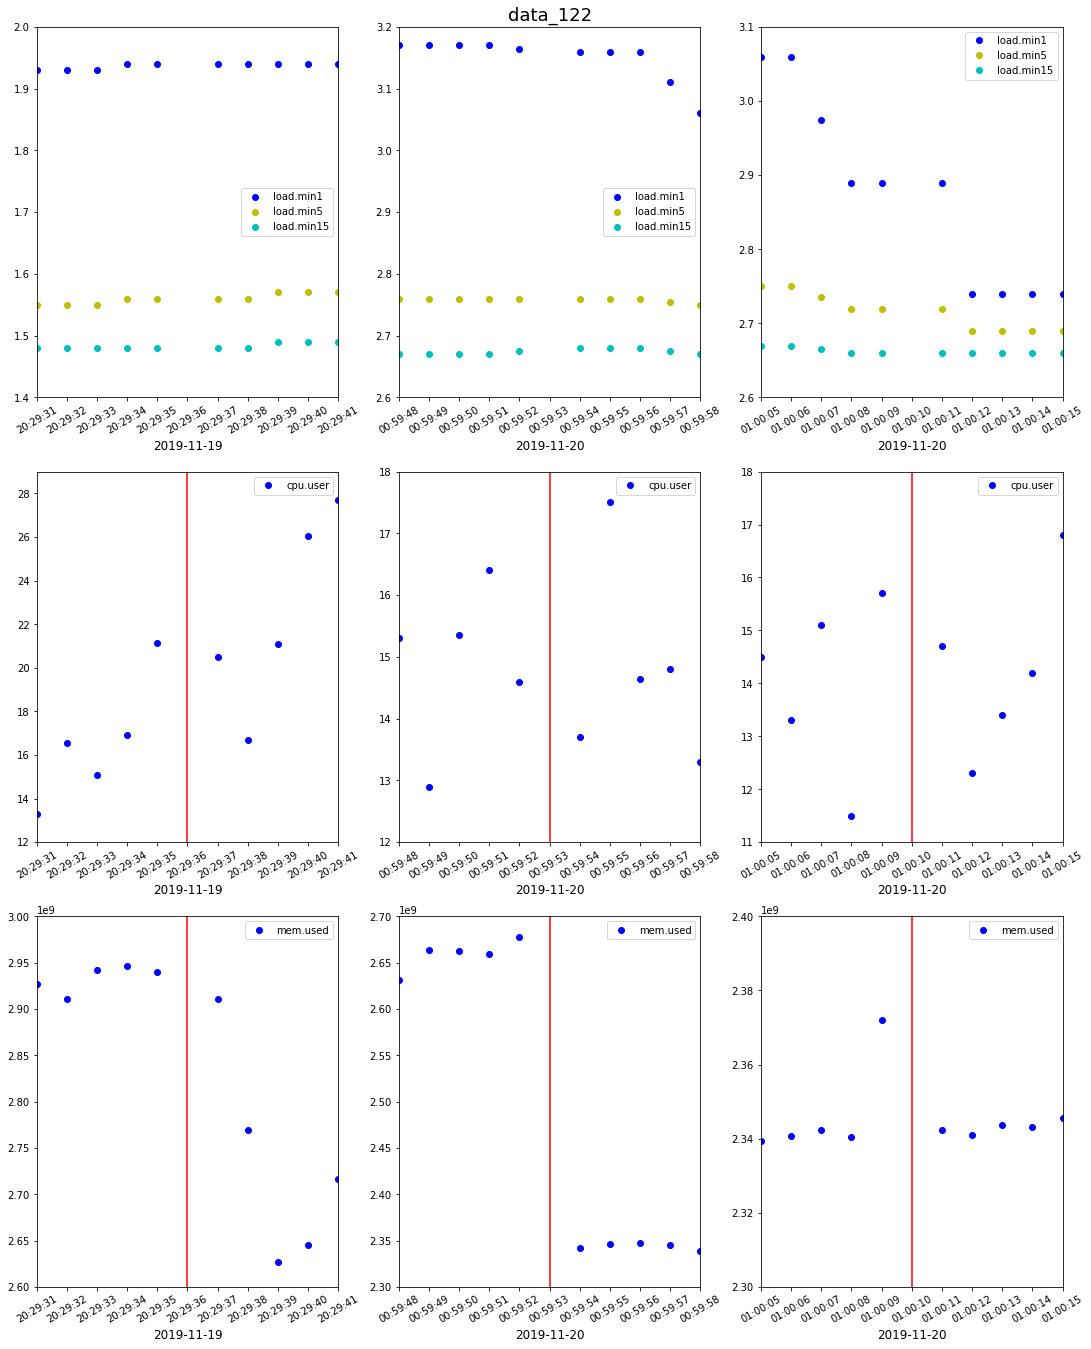

In [8]:
# [Timestamp('2019-11-19 20:29:36'), Timestamp('2019-11-20 00:59:53'), Timestamp('2019-11-20 01:00:10')]

fig, axes = plt.subplots(3, 3)

axes[0, 0].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_122)
axes[0, 0].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_122)
axes[0, 0].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_122)
axes[0, 0].legend()
plt.setp(axes[0, 0], ylim = (1.4, 2), xlim = ('2019-11-19 20:29:31', '2019-11-19 20:29:41'))
axes[0, 0].set_xlabel('2019-11-19', fontsize = 12)
axes[0, 0].set_title("data_122", fontsize = 18, x = 1.7)

axes[0, 1].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_122)
axes[0, 1].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_122)
axes[0, 1].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_122)
axes[0, 1].legend()
plt.setp(axes[0, 1], ylim = (2.6, 3.2), xlim = ('2019-11-20 00:59:48', '2019-11-20 00:59:58'))
axes[0, 1].set_xlabel('2019-11-20', fontsize = 12)

axes[0, 2].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_122)
axes[0, 2].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_122)
axes[0, 2].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_122)
axes[0, 2].legend()
plt.setp(axes[0, 2], ylim = (2.6, 3.1), xlim = ('2019-11-20 01:00:05', '2019-11-20 01:00:15'))
axes[0, 2].set_xlabel('2019-11-20', fontsize = 12)


axes[1, 0].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_122)
axes[1, 0].legend()
plt.setp(axes[1, 0], ylim = (12, 29), xlim = ('2019-11-19 20:29:31', '2019-11-19 20:29:41'))
axes[1, 0].axvline(x = '2019-11-19 20:29:36', color = 'red')
axes[1, 0].set_xlabel('2019-11-19', fontsize = 12)

axes[1, 1].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_122)
axes[1, 1].legend()
plt.setp(axes[1, 1], ylim = (12, 18), xlim = ('2019-11-20 00:59:48', '2019-11-20 00:59:58'))
axes[1, 1].axvline(x = '2019-11-20 00:59:53', color = 'red')
axes[1, 1].set_xlabel('2019-11-20', fontsize = 12)

axes[1, 2].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_122)
axes[1, 2].legend()
plt.setp(axes[1, 2], ylim = (11, 18), xlim = ('2019-11-20 01:00:05', '2019-11-20 01:00:15'))
axes[1, 2].axvline(x = '2019-11-20 01:00:10', color = 'red')
axes[1, 2].set_xlabel('2019-11-20', fontsize = 12)


axes[2, 0].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_122)
axes[2, 0].legend()
plt.setp(axes[2, 0], ylim = (2600000000, 3000000000), xlim = ('2019-11-19 20:29:31', '2019-11-19 20:29:41'))
axes[2, 0].axvline(x = '2019-11-19 20:29:36', color = 'red')
axes[2, 0].set_xlabel('2019-11-19', fontsize = 12)

axes[2, 1].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_122)
axes[2, 1].legend()
plt.setp(axes[2, 1], ylim = (2300000000, 2700000000), xlim = ('2019-11-20 00:59:48', '2019-11-20 00:59:58'))
axes[2, 1].axvline(x = '2019-11-20 00:59:53', color = 'red')
axes[2, 1].set_xlabel('2019-11-20', fontsize = 12)

axes[2, 2].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_122)
axes[2, 2].legend()
plt.setp(axes[2, 2], ylim = (2300000000, 2400000000), xlim = ('2019-11-20 01:00:05', '2019-11-20 01:00:15'))
axes[2, 2].axvline(x = '2019-11-20 01:00:10', color = 'red')
axes[2, 2].set_xlabel('2019-11-20', fontsize = 12)


plt.subplots_adjust(top = 4.5, right = 2.5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)

plt.show()

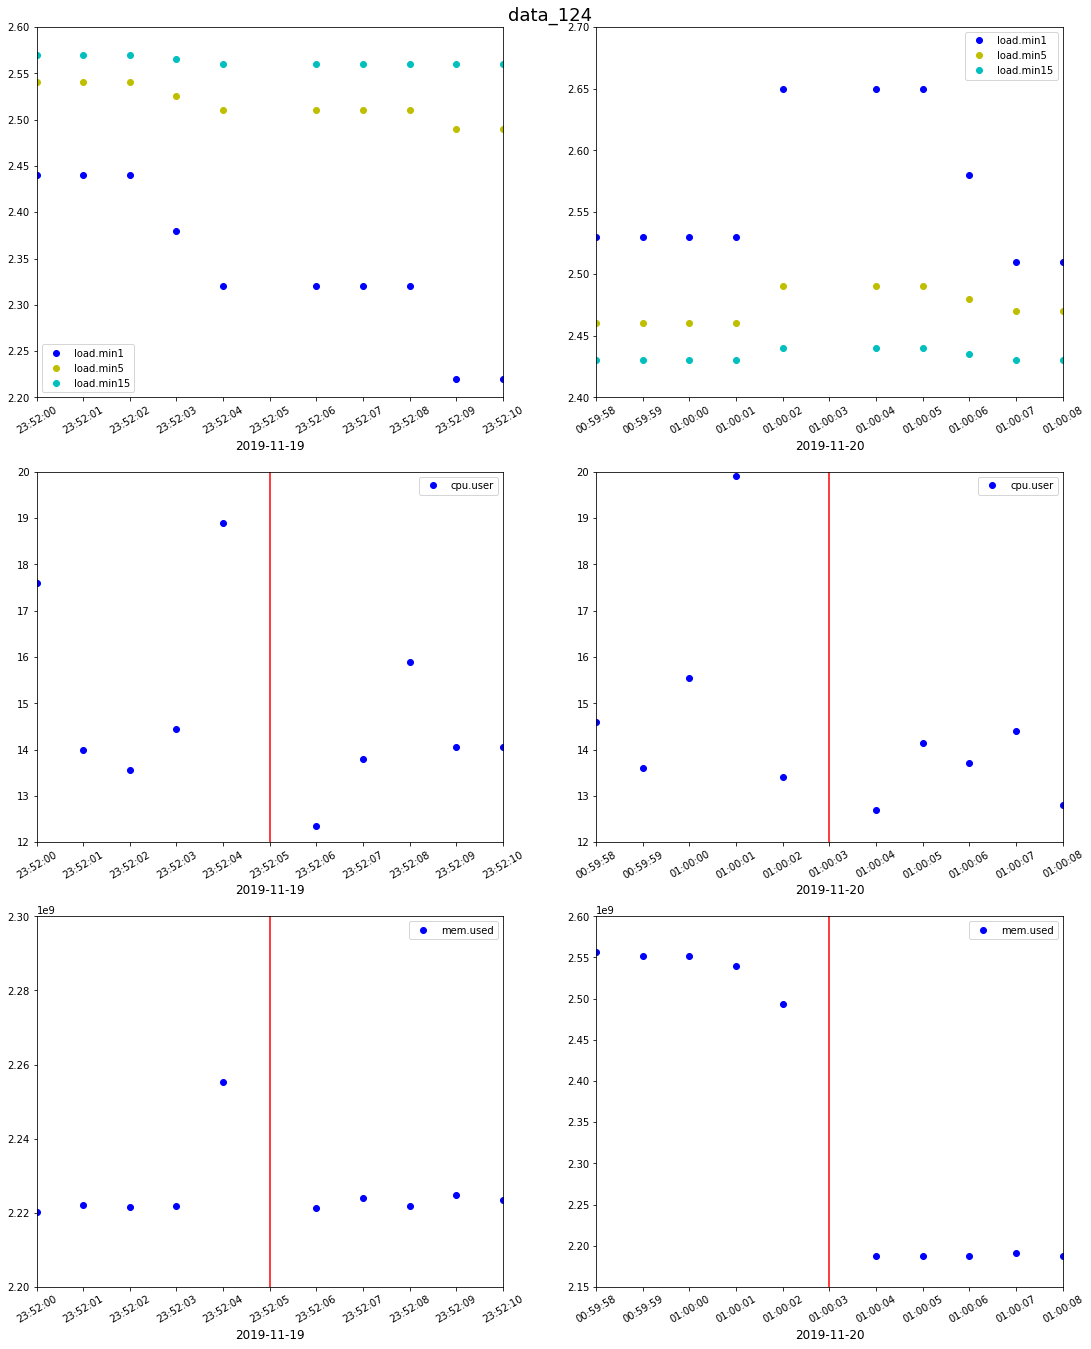

In [9]:
# [Timestamp('2019-11-19 23:52:05'), Timestamp('2019-11-20 01:00:03')]
    
fig, axes = plt.subplots(3, 2)

axes[0, 0].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_124)
axes[0, 0].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_124)
axes[0, 0].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_124)
axes[0, 0].legend()
plt.setp(axes[0, 0], ylim = (2.2, 2.6), xlim = ('2019-11-19 23:52:00', '2019-11-19 23:52:10'))
axes[0, 0].set_xlabel('2019-11-19', fontsize = 12)
axes[0, 0].set_title("data_124", fontsize = 18, x = 1.1)

axes[0, 1].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_124)
axes[0, 1].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_124)
axes[0, 1].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_124)
axes[0, 1].legend()
plt.setp(axes[0, 1], ylim = (2.4, 2.7), xlim = ('2019-11-20 00:59:58', '2019-11-20 01:00:08'))
axes[0, 1].set_xlabel('2019-11-20', fontsize = 12)


axes[1, 0].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_124)
axes[1, 0].legend()
plt.setp(axes[1, 0], ylim = (12, 20), xlim = ('2019-11-19 23:52:00', '2019-11-19 23:52:10'))
axes[1, 0].axvline(x = '2019-11-19 23:52:05', color = 'red')
axes[1, 0].set_xlabel('2019-11-19', fontsize = 12)

axes[1, 1].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_124)
axes[1, 1].legend()
plt.setp(axes[1, 1], ylim = (12, 20), xlim = ('2019-11-20 00:59:58', '2019-11-20 01:00:08'))
axes[1, 1].axvline(x = '2019-11-20 01:00:03', color = 'red')
axes[1, 1].set_xlabel('2019-11-20', fontsize = 12)


axes[2, 0].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_124)
axes[2, 0].legend()
plt.setp(axes[2, 0], ylim = (2200000000, 2300000000), xlim = ('2019-11-19 23:52:00', '2019-11-19 23:52:10'))
axes[2, 0].axvline(x = '2019-11-19 23:52:05', color = 'red')
axes[2, 0].set_xlabel('2019-11-19', fontsize = 12)

axes[2, 1].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_124)
axes[2, 1].legend()
plt.setp(axes[2, 1], ylim = (2150000000, 2600000000), xlim = ('2019-11-20 00:59:58', '2019-11-20 01:00:08'))
axes[2, 1].axvline(x = '2019-11-20 01:00:03', color = 'red')
axes[2, 1].set_xlabel('2019-11-20', fontsize = 12)


plt.subplots_adjust(top = 4.5, right = 2.5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)

plt.show()

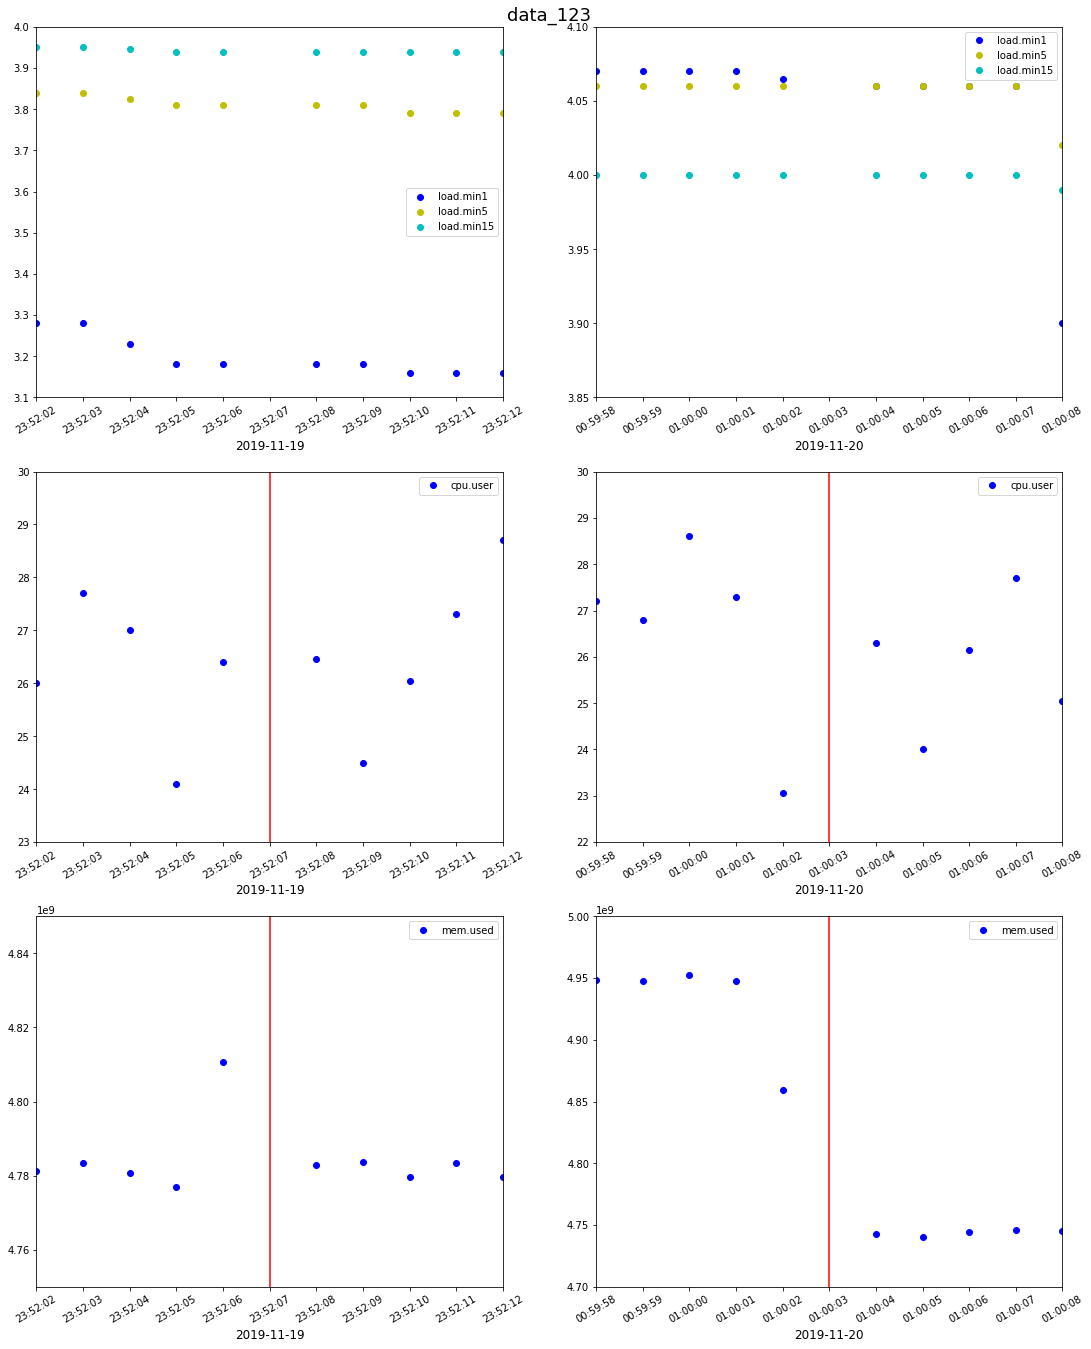

In [10]:
# [Timestamp('2019-11-19 23:52:07'), Timestamp('2019-11-20 01:00:03')]

fig, axes = plt.subplots(3, 2)

axes[0, 0].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_123)
axes[0, 0].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_123)
axes[0, 0].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_123)
axes[0, 0].legend()
plt.setp(axes[0, 0], ylim = (3.1, 4), xlim = ('2019-11-19 23:52:02', '2019-11-19 23:52:12'))
axes[0, 0].set_xlabel('2019-11-19', fontsize = 12)
axes[0, 0].set_title("data_123", fontsize = 18, x = 1.1)

axes[0, 1].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_123)
axes[0, 1].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_123)
axes[0, 1].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_123)
axes[0, 1].legend()
plt.setp(axes[0, 1], ylim = (3.85, 4.1), xlim = ('2019-11-20 00:59:58', '2019-11-20 01:00:08'))
axes[0, 1].set_xlabel('2019-11-20', fontsize = 12)


axes[1, 0].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_123)
axes[1, 0].legend()
plt.setp(axes[1, 0], ylim = (23, 30), xlim = ('2019-11-19 23:52:02', '2019-11-19 23:52:12'))
axes[1, 0].axvline(x = '2019-11-19 23:52:07', color = 'red')
axes[1, 0].set_xlabel('2019-11-19', fontsize = 12)

axes[1, 1].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_123)
axes[1, 1].legend()
plt.setp(axes[1, 1], ylim = (22, 30), xlim = ('2019-11-20 00:59:58', '2019-11-20 01:00:08'))
axes[1, 1].axvline(x = '2019-11-20 01:00:03', color = 'red')
axes[1, 1].set_xlabel('2019-11-20', fontsize = 12)


axes[2, 0].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_123)
axes[2, 0].legend()
plt.setp(axes[2, 0], ylim = (4750000000, 4850000000), xlim = ('2019-11-19 23:52:02', '2019-11-19 23:52:12'))
axes[2, 0].axvline(x = '2019-11-19 23:52:07', color = 'red')
axes[2, 0].set_xlabel('2019-11-19', fontsize = 12)

axes[2, 1].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_123)
axes[2, 1].legend()
plt.setp(axes[2, 1], ylim = (4700000000, 5000000000), xlim = ('2019-11-20 00:59:58', '2019-11-20 01:00:08'))
axes[2, 1].axvline(x = '2019-11-20 01:00:03', color = 'red')
axes[2, 1].set_xlabel('2019-11-20', fontsize = 12)


plt.subplots_adjust(top = 4.5, right = 2.5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)

plt.show()

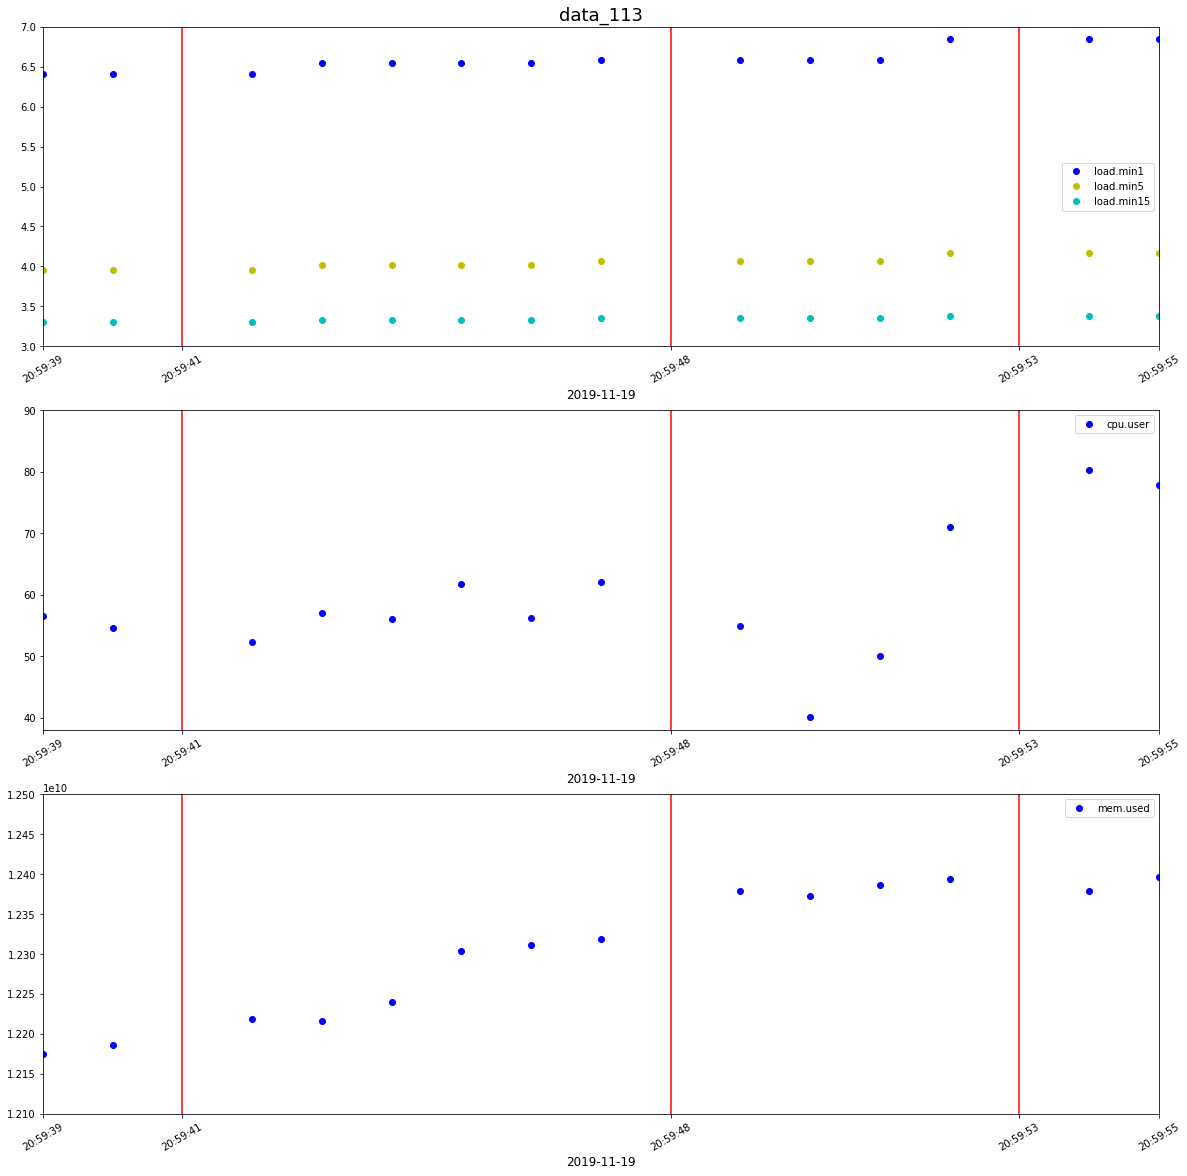

In [11]:
# Timestamp('2019-11-19 20:59:41'), Timestamp('2019-11-19 20:59:48'), Timestamp('2019-11-19 20:59:53')

fig, axes = plt.subplots(3, 1, figsize=(20, 20))

axes[0].plot('now', 'load.min1', 'bo', label = 'load.min1', data = data_113)
axes[0].plot('now', 'load.min5', 'yo', label = 'load.min5', data = data_113)
axes[0].plot('now', 'load.min15', 'co', label = 'load.min15', data = data_113)
axes[0].legend()
plt.setp(axes[0], ylim = (3, 7), xlim = ('2019-11-19 20:59:39', '2019-11-19 20:59:55'))
axes[0].axvline(x = '2019-11-19 20:59:41', color = 'red')
axes[0].axvline(x = '2019-11-19 20:59:48', color = 'red')
axes[0].axvline(x = '2019-11-19 20:59:53', color = 'red')
axes[0].set_xlabel('2019-11-19', fontsize = 12)
axes[0].set_title("data_113", fontsize = 18)


axes[1].plot('now', 'cpu.user', 'bo', label = 'cpu.user', data = data_113)
axes[1].legend()
plt.setp(axes[1], ylim = (38, 90), xlim = ('2019-11-19 20:59:39', '2019-11-19 20:59:55'))
axes[1].axvline(x = '2019-11-19 20:59:41', color = 'red')
axes[1].axvline(x = '2019-11-19 20:59:48', color = 'red')
axes[1].axvline(x = '2019-11-19 20:59:53', color = 'red')
axes[1].set_xlabel('2019-11-19', fontsize = 12)


axes[2].plot('now', 'mem.used', 'bo', label = 'mem.used', data = data_113)
axes[2].legend()
plt.setp(axes[2], ylim = (12100000000, 12500000000), xlim = ('2019-11-19 20:59:39', '2019-11-19 20:59:55'))
axes[2].axvline(x = '2019-11-19 20:59:41', color = 'red')
axes[2].axvline(x = '2019-11-19 20:59:48', color = 'red')
axes[2].axvline(x = '2019-11-19 20:59:53', color = 'red')
axes[2].set_xlabel('2019-11-19', fontsize = 12)

myFmt = mdates.DateFormatter('%H:%M:%S')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(['2019-11-19 20:59:39', '2019-11-19 20:59:41', '2019-11-19 20:59:48', '2019-11-19 20:59:53', '2019-11-19 20:59:55'], rotation=30)
    plt.gca().xaxis.set_major_formatter(myFmt)

plt.show()